# Feature Scaling Demo

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [3]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Scaling our data

Let's see what effect scaling our data has on some of the features by picking two features
that have a large difference in scale.

In [4]:
feature_x, feature_y = "NOX", "TAX"

x = df[feature_x]
y = df[feature_y]

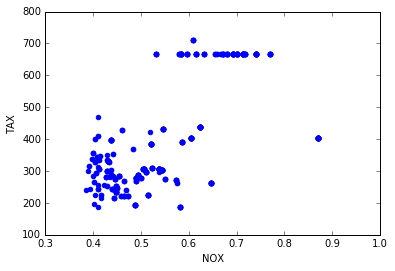

In [5]:
plt.scatter(x, y, color='b')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

### Standardization

Let's apply standardization, transforming our data to have mean zero $(\mu = 0)$ and variance 1 $(\sigma^2 = 1)$ by the formula:

$$ x' = \frac{x - \mu}{\sigma}$$

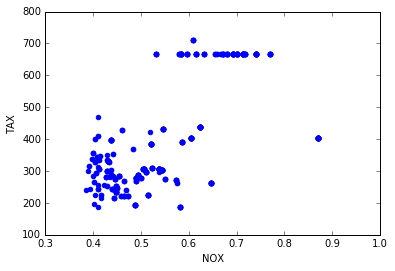

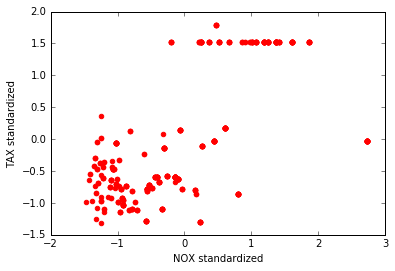

In [8]:
plt.scatter(x, y, color='b')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

x_s = (x - x.mean())/x.std()
y_s = (y - y.mean())/y.std()

# x_s = (x - np.mean(x))/np.std(x)
# y_s = (y - np.mean(y))/np.std(y)

plt.scatter(x_s, y_s, color='r')
plt.xlabel("{} standardized".format(feature_x))
plt.ylabel("{} standardized".format(feature_y))
plt.show()

As you can see, we did not change the shape of the data, just its scale. You can also use scikit-learn to standardize your data.

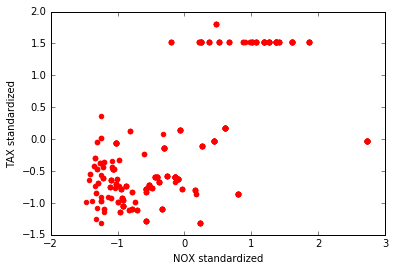

In [12]:
from sklearn import preprocessing

x_s = preprocessing.scale(x)
y_s = preprocessing.scale(y)

plt.scatter(x_s, y_s, color='r')
plt.xlabel("{} standardized".format(feature_x))
plt.ylabel("{} standardized".format(feature_y))

plt.show()

### Min-Max Scaling

To Min-Max scale our data, we use the formula:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

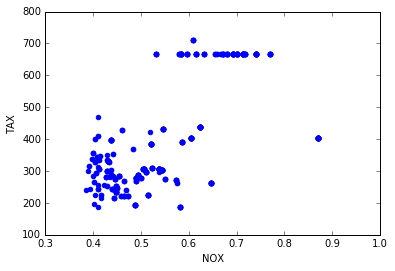

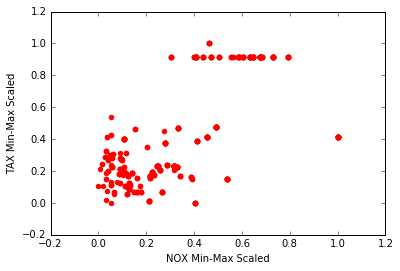

In [13]:
plt.scatter(x, y, color='b')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

x_m = (x - np.min(x)) / (np.max(x) - np.min(x))
y_m = (y - np.min(y)) / (np.max(y) - np.min(y))

plt.scatter(x_m, y_m, color='r')
plt.xlabel("{} Min-Max Scaled".format(feature_x))
plt.ylabel("{} Min-Max Scaled".format(feature_y))
plt.show()

We can also use scikit-learn to Min-Max Scale.

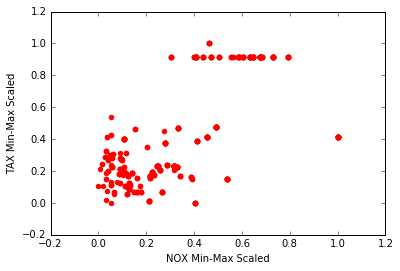

In [16]:
from sklearn import preprocessing

x_s = preprocessing.minmax_scale(x)
y_s = preprocessing.minmax_scale(y)

plt.scatter(x_s, y_s, color='r')
plt.xlabel("{} Min-Max Scaled".format(feature_x))
plt.ylabel("{} Min-Max Scaled".format(feature_y))

plt.show()

### Normalization

We normalize the data by dividing through by some kind of sum or total. For example, it's common to normalize simply by the (*L1*) sum $|X| = \sum_{x \in X}{x}$ or by the (*L2*) euclidean sum of squares distance  $||X|| = \sqrt{\sum_{x \in X}{x^2}}$:

$$x' = \frac{x}{|X|}$$

## Guided Practice

Perform normalization by both the L1 and L2 sums and plot as we did for the other scaling methods.

If you finish early, repeat the exercise [using scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization).

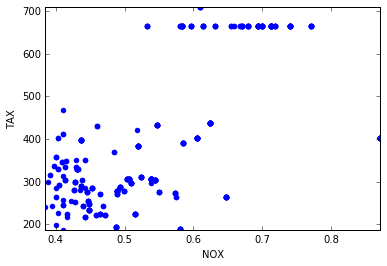

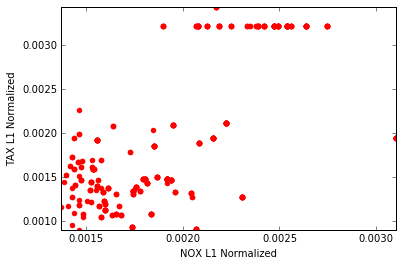

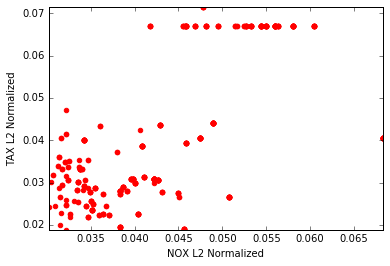

/Users/pizzato/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/pizzato/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


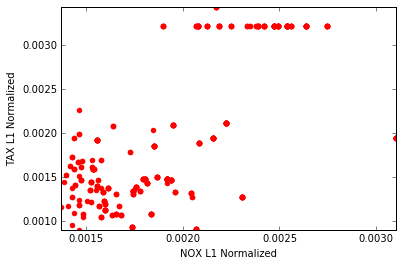

/Users/pizzato/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/pizzato/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


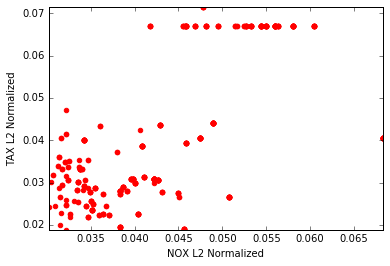

In [18]:
plt.scatter(x, y, color='b')
plt.xlim((np.min(x), np.max(x)))
plt.ylim((np.min(y), np.max(y)))
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

x_l1 = x / np.sum(np.abs(x))
y_l1 = y / np.sum(np.abs(y))

plt.scatter(x_l1, y_l1, color='r')
plt.xlim((np.min(x_l1), np.max(x_l1)))
plt.ylim((np.min(y_l1), np.max(y_l1)))
plt.xlabel("{} L1 Normalized".format(feature_x))
plt.ylabel("{} L1 Normalized".format(feature_y))
plt.show()

x_l2 = x / (np.sum(x**2))**0.5
y_l2 = y / (np.sum(y**2))**0.5

# x_l2 = x / np.sqrt(np.dot(x, x))
# y_l2 = y / np.sqrt(np.dot(y, y))

plt.scatter(x_l2, y_l2, color='r')
plt.xlim((np.min(x_l2), np.max(x_l2)))
plt.ylim((np.min(y_l2), np.max(y_l2)))
plt.xlabel("{} L2 Normalized".format(feature_x))
plt.ylabel("{} L2 Normalized".format(feature_y))
plt.show()

# Sklearn

x_l1 = preprocessing.normalize(x, norm='l1')
y_l1 = preprocessing.normalize(y, norm='l1')

plt.scatter(x_l1, y_l1, color='r')
plt.xlim((np.min(x_l1), np.max(x_l1)))
plt.ylim((np.min(y_l1), np.max(y_l1)))
plt.xlabel("{} L1 Normalized".format(feature_x))
plt.ylabel("{} L1 Normalized".format(feature_y))
plt.show()

x_l1 = preprocessing.normalize(x, norm='l2')
y_l1 = preprocessing.normalize(y, norm='l2')

plt.scatter(x_l2, y_l2, color='r')
plt.xlim((np.min(x_l2), np.max(x_l2)))
plt.ylim((np.min(y_l2), np.max(y_l2)))
plt.xlabel("{} L2 Normalized".format(feature_x))
plt.ylabel("{} L2 Normalized".format(feature_y))
plt.show()

### Independent Practice

Let's practice linear fits using feature scaling. For each of the three scaling methods we've discussed:
* Practice scaling and linear fits on the boston housing data using all the data (scaled) versus the target data `boston.target`. Does scaling or normalization affect any of your models? Determine if the model fit score changed. Explain why or why not. (10-20 mins).

Next:
* Try some regularized models. Does scaling have a significant effect on the fit? (10 mins)
* Try some other models from scikit-learn, such as a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).
It's ok if you are unfamiliar with the model, just follow the example code
and explore the fit and the effect of scaling. (10 mins)
* Bonus: try a few extra models like a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). What do you think
about the goodness of fit? Scaling is _required_ for this model.

### Bonus Exercises

Using Scikit-learn, fit some other model to the data, for example a regularization model like a Ridge or Lasso, a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), or a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). Do any of the scaling methods affect the goodness of fit?

/Users/pizzato/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


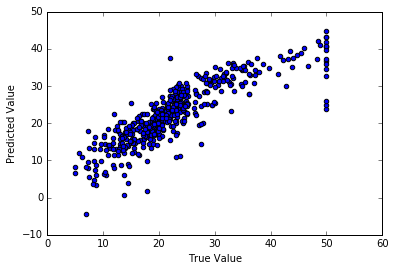

r^2: 0.740607742865


In [19]:
# These are all basically the same, here's one example.
# The linear regression fit score is not affected by scaling since the coefficients adapt.

df = pd.DataFrame(boston.data, columns=boston.feature_names)

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df)
y = boston.target

lm = linear_model.LinearRegression(normalize=False)
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print "r^2:", model.score(X, y)

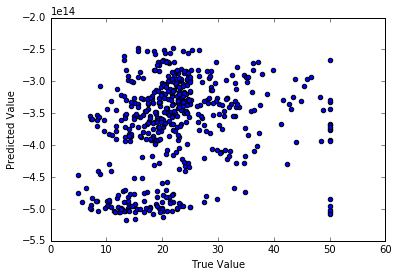

Model score: -1.68090829587e+27


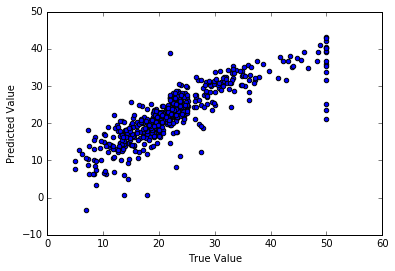

Model score: 0.727842521703


In [20]:
# Stochastic Regressor -- scaling makes a huge difference

def plot_sgd_reg(X, y):
    lm = linear_model.SGDRegressor()
    model = lm.fit(X, y)
    predictions = lm.predict(X)

    plt.scatter(y, predictions)
    plt.xlabel("True Value")
    plt.ylabel("Predicted Value")

    plt.show()
    print "Model score:", model.score(X, y)


# Not scaled

X = df
y = boston.target

plot_sgd_reg(X, y)

# Scaled
X = preprocessing.scale(df)
y = boston.target

plot_sgd_reg(X, y)

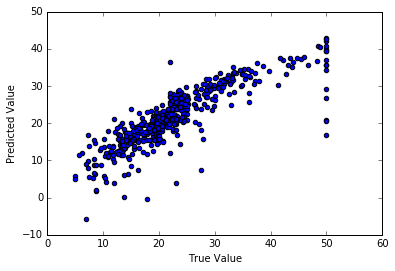

Model score: 0.708924413119


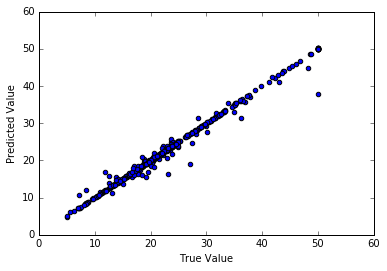

Model score: 0.988401657817


In [21]:
from sklearn.svm import SVR

# Support Vector regression

def plot_svr(X, y, lm):
    model = lm.fit(X, y)
    predictions = lm.predict(X)

    plt.scatter(y, predictions)
    plt.xlabel("True Value")
    plt.ylabel("Predicted Value")

    plt.show()
    print "Model score:", model.score(X, y)


# # Unscaled WILL CRASH or take a long time


# Scaled

X = preprocessing.scale(df)
y = boston.target
lm = SVR(kernel='linear', C=1e3)

plot_svr(X, y, lm)

# Scaled, RBF kernel

X = preprocessing.scale(df)
y = boston.target
lm = SVR(kernel='rbf', C=1e3, gamma=0.1)

plot_svr(X, y, lm)
